In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
churn_data = pd.read_csv(r"G:\DataSets\Churn_Modelling.csv")
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [28]:
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Dropping the unecessary columns like RowNumber, CustomerId, Surname

In [29]:
churn_data = churn_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [30]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Encoding the categorical Columns

In [31]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Encoding Gender and Geography

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
churn_data['Geography'] = le.fit_transform(churn_data.Geography)
churn_data['Gender'] = le.fit_transform(churn_data.Gender)

In [33]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [34]:
X_IV = churn_data.iloc[:, 0:10]
Y_DV = churn_data.iloc[:, 10]

<Axes: >

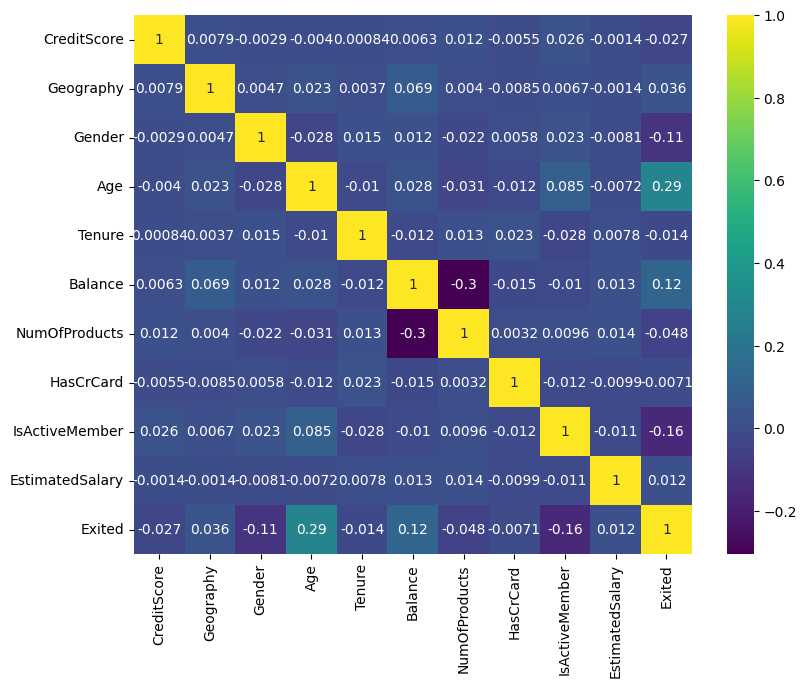

In [35]:
corr = churn_data.corr()
plt.figure(figsize=(9,7)) 
sns.heatmap(corr, cmap='viridis', annot=True)

Split data into training and testing

In [36]:
from sklearn.model_selection import train_test_split
X_train,Xtest,Y_train,Y_test=train_test_split(X_IV,Y_DV,test_size=.30,random_state=101)

In [37]:
print(f'toatal sample in x is {len(X_IV)} and total sample in y {len(Y_DV)}')

toatal sample in x is 10000 and total sample in y 10000


In [38]:
print(f'toatal sample in X_train is {len(X_train)} and total sample in Y_train {len(Y_train)}')
print(f'toatal sample in Xtest is {len(Xtest)} and total sample in Y_test {len(Y_test)}')

toatal sample in X_train is 7000 and total sample in Y_train 7000
toatal sample in Xtest is 3000 and total sample in Y_test 3000


Logistic Regression Algorithm

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(Xtest)

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
score = accuracy_score(Y_test, y_pred)*100
print('Accuracy of logistic regression classifier on test set: {:.2f} %'.format(score))

Accuracy of logistic regression classifier on test set: 78.20 %


In [41]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2378
           1       0.32      0.05      0.08       622

    accuracy                           0.78      3000
   macro avg       0.56      0.51      0.48      3000
weighted avg       0.70      0.78      0.71      3000



<Axes: >

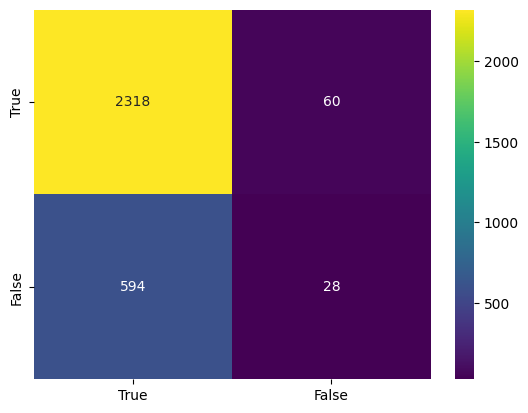

In [42]:
cm_matrix =confusion_matrix(Y_test, y_pred)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis',xticklabels=['True', 'False'], yticklabels=['True', 'False'])